# Import Modules

In [2]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score,  recall_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.multiclass import unique_labels

# Intial Data Exploration

In [4]:
data = pd.read_csv('input.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (181, 11)


In [5]:
data.head()

,r,fck,n,fy,As,fyw,ρw,fsw,ρsw,Vf/Vs,Failure mode
0,2.21,24.0,0.04,480.0,180.0,480.0,1.17,510.0,0.64,0.33,F
1,2.21,34.7,0.03,480.0,180.0,480.0,2.80,510.0,1.28,0.31,FS
2,2.50,16.9,0.21,469.2,314.0,445.6,0.72,608.9,0.44,0.48,F
3,2.50,16.9,0.34,469.2,314.0,445.6,0.72,608.9,0.44,0.47,F
4,2.50,16.9,0.48,469.2,314.0,445.6,0.72,608.9,0.44,0.41,F


In [6]:
data.dtypes

r               float64
fck             float64
n               float64
fy              float64
As              float64
fyw             float64
ρw              float64
fsw             float64
ρsw             float64
Vf/Vs           float64
Failure mode     object
dtype: object

## Variable Definitions
| Variable | Definition |
| -------- | ---------- |
| r | Aspect Ratio |
|f_{ck} | Concrete compressive strength |
| n | Axial load ratio |
| f_y | Yield strength of boundary veritcal reinforcement |
| A_s | Area of boundary vertical reinforcement |
| f_{yw} | Yield strength of web vertical reinforcement | 
| &rho;_w | Web vertical reinforcement ratio | 
| f_{sw} | Yield strength of web horizontal reinforcement |
| &rho;_{sw} | Web horizontal reiforcement ratio |
| V_f/V | Shear demand to capacity ratio |

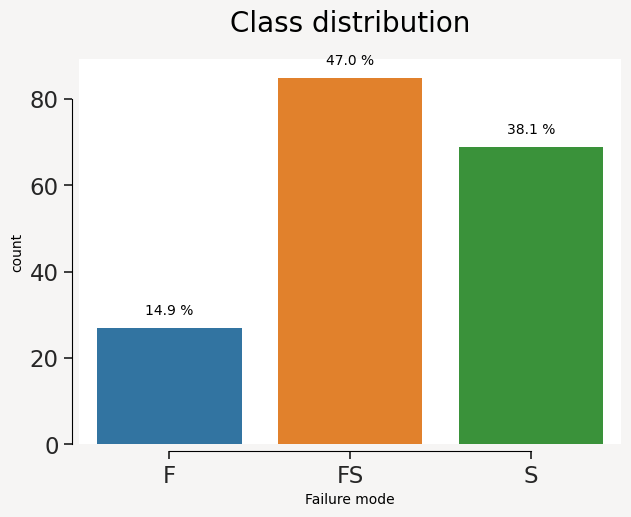

In [7]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
# ax = sns.countplot(x=data['Failure'], palette=mypal[1::1])
ax = sns.countplot(x=data['Failure mode'])
# ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center")

ax.set_title('Class distribution', fontsize=20, y=1.05)
sns.set(font_scale=1.5)
# plt.rc('font',family='Times New Roman',size=12)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Data Splitting

In [8]:
X = data.loc[:, data.columns != 'Failure mode']
y=data['Failure mode']
X.head()

,r,fck,n,fy,As,fyw,ρw,fsw,ρsw,Vf/Vs
0,2.21,24.0,0.04,480.0,180.0,480.0,1.17,510.0,0.64,0.33
1,2.21,34.7,0.03,480.0,180.0,480.0,2.80,510.0,1.28,0.31
2,2.50,16.9,0.21,469.2,314.0,445.6,0.72,608.9,0.44,0.48
3,2.50,16.9,0.34,469.2,314.0,445.6,0.72,608.9,0.44,0.47
4,2.50,16.9,0.48,469.2,314.0,445.6,0.72,608.9,0.44,0.41


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the models

In [10]:
classifiers = [GaussianNB(), 
               KNeighborsClassifier(n_neighbors=5),
               LogisticRegression(solver="liblinear", random_state=0),
               SVC(probability=True, random_state=0),
               DecisionTreeClassifier(random_state=0),
               RandomForestClassifier(random_state=0),
               AdaBoostClassifier(n_estimators=100, random_state=0),
               GradientBoostingClassifier(random_state=0),
               MLPClassifier(random_state=0)]

In [11]:
for cls in classifiers:
    cls.fit(X_train, y_train)

# Testing

In [20]:
results = {}

for cls in classifiers:
    y_pred = cls.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[type(cls).__name__] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Convert the results dictionary to a DataFrame for easier analysis
results_df = pd.DataFrame.from_dict(results, orient='index')

print(results_df)

    

                            Accuracy  Precision    Recall  F1-Score
GaussianNB                  0.727273   0.819100  0.727273  0.739947
KNeighborsClassifier        0.800000   0.851316  0.800000  0.814109
LogisticRegression          0.800000   0.775568  0.800000  0.783706
SVC                         0.872727   0.873977  0.872727  0.870768
DecisionTreeClassifier      0.909091   0.912987  0.909091  0.910391
RandomForestClassifier      0.927273   0.932468  0.927273  0.929138
AdaBoostClassifier          0.818182   0.755711  0.818182  0.772965
GradientBoostingClassifier  0.927273   0.932468  0.927273  0.929138
MLPClassifier               0.818182   0.807038  0.818182  0.810303
